# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
#### Tal Daniel
## Tutorial 02 - Introduction to Statistics

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Statistics Definitions
* Null and Alternative Hypotheses
* Central Limit Theorem (CLT)
* P-Value, Significance Level and Power
* Confusion Matrix
* Useful Inequalities

<img src="https://www.azquotes.com/vangogh-image-quotes/7/92/Quotation-Benjamin-Disraeli-There-are-three-kinds-of-lies-lies-damned-lies-and-7-92-39.jpg" style="height:400px">
(image from <a href="https://www.azquotes.com/quote/79239">azquotes.com</a>)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


| <center>Definition</center> | <center>Description</center> | <center>Types</center> | <center>Example</center>  |
| --- | --- | --- | --- |
| **Population** | <center> All possible values, the entire pool from which a statistical sample is drawn. A population can thus be said to be an aggregate observation of subjects grouped together by a common feature. </center>|  | <center> An entire group of people, objects, events, hospital visits, or measurements </center>|
| **Sample** |<center> A portion of the population, a random selection of members of a population. It is a smaller group drawn from the population that has the characteristics of the entire population. The observations and conclusions made against the sample data are attributed to the population. </center>| |<center> 1,000 participants from the total 200,000 test sitters </center>|
| **Statistical Inference** |<center> Generalizing from a sample to a population with calculated degree of certainty </center>| <center>1. Hypothesis Testing (today) <br> 2. Estimation (previous tutorial) </center>|  |
| **Parameter** |<center> A characteristic of population, any numerical quantity that characterizes a given population or some aspect of it. This means the parameter tells us something about the whole population. </center>| | <center>Population mean $\mu$</center> |
| **Statistic** |<center> Calculated from data in the sample, a single measure of some attribute of a sample. It is calculated by applying a function (statistical algorithm) to the values of the items of the sample, which are known together as a set of data. </center>| | <center>Sample mean $\overline{X}$</center> |

### <img src="https://img.icons8.com/dusk/64/000000/note.png" style="height:40px;display:inline"> Notes
*  The sample must be **random**. A random sample is one in which every member of a population has an equal chance of being selected.
* **Variables are Not Parameters** - Variables, like the name suggests, are quantities that can be changed by the experimenter. For example, the number of cases to study for a given problem is a variable. Thus a researcher might choose a population of 100 people or 150 people, depending on various statistical requirements. This would count as a variable. A parameter, on the other hand, will be independent of the variable and the number of cases that are taken to study. In fact, the parameters will fix the distribution irrespective of the total number of cases under study.
* Notice the difference in notations, while the mean for the population denoted $\mu$, the statistic of the mean for a sample is denoted $\overline{X}$.

The relationship between population and sample:
<img src="https://www.cliffsnotes.com/assets/267169.png">
(image from <a href="https://www.cliffsnotes.com/study-guides/statistics/sampling/populations-samples-parameters-and-statistics">cliffnotes.com</a>


### <img src="https://img.icons8.com/dusk/64/000000/compare.png" style="height:40px;display:inline"> The Difference Between Parameters & Statistics
* **Parameters and statistics are related, but are not the same thing.**

|  | Parameters | Statistics |
| -| ---------- | ---------- |
| **Source** | <center> Population </center>| <center> Sample </center>|
| **Random** |<center> No </center>|<center> Yes</center>|
| **Calculated** |<center> No</center>| <center> Yes </center>|

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Parameters & Statistics
Let's say we have a population of 10,000 people. Let's compare the mean height of a sample and the mean height of the population.

In [7]:
# let's load the heights dataset from previous tutorial
# load the data
dataset = pd.read_csv('./datasets/heights_dataset.csv')
# use only the heights
dataset = dataset.drop('Weight', axis=1)
# inch -> cm
dataset['Height'] = dataset['Height'] * 2.54
# print the number of rows in the data set
number_of_rows = len(dataset)
print('size of the population: {}'.format(number_of_rows))
print("the mean height parameter of the population: {:.3f} cm".format(dataset.Height.mean()))
# let's draw 1000 samples
print("the mean height statistic of sample 1: {:.3f} cm".format(dataset.Height.sample(1000).mean()))
print("the mean height statistic of sample 2: {:.3f} cm".format(dataset.Height.sample(1000).mean()))
print("the mean height statistic of sample 3: {:.3f} cm".format(dataset.Height.sample(1000).mean()))

size of the population: 10000
the mean height parameter of the population: 168.574 cm
the mean height statistic of sample 1: 169.033 cm
the mean height statistic of sample 2: 168.593 cm
the mean height statistic of sample 3: 168.932 cm


## <img src="https://img.icons8.com/dusk/64/000000/workflow.png" style="height:50px;display:inline"> Hypothesis Testing Steps

1. **Null & Alternative Hypotheses** -  Formulate the null hypothesis $H_0$ (that the observations are the result of pure chance) and the alternative hypothesis $H_a$ (that the observations show a real effect combined with a component of chance variation).

2. **Test Statistic** - Identify a test statistic that can be used to assess the truth of the null hypothesis. It is a value computed from sample data. The test statistic is used to assess the strength of evidence in support of a null hypothesis.

3. **P-value & Interpretation** - Compute the P-value, which is the probability that a test statistic, at least as significant as the one observed, would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence **against** the null hypothesis.

4. **Significance Level** - Compare the p-value to an acceptable significance value $\alpha$ (sometimes called an $\alpha$ value, a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.). If $p \leq \alpha$ (the observed effect is statistically significant), the null hypothesis is ruled out, and the alternative hypothesis is valid.

### <img src="https://img.icons8.com/ios/100/000000/battle.png" style="height:30px;display:inline"> The Two Competing Theories
* **NULL** Hypothesis - $H_0$ - any observed deviation from what we expect to see is due to chance variability.
* **ALTERNATIVE** Hypothesis - $H_a$ - 'claim', or a theory you wish to test (the reason for the observed statistic).

$H_0$ is assumed **true** until enough evidence goes against it (we then refute it and believe the alternative $H_a$).

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Body Weight
The following example will be used to demonstrate the statistic process:

In the 1970s, 20–29 year old men in the U.S. had a mean $\mu$ body weight of 170 pounds (~77 kg). Standard deviation $\sigma$ was 40 pounds (~18 kg). We test whether mean body weight in the population is bigger now.

#### 1- Null & Alternative Hypotheses 

* Under the **null hypothesis** there is no difference in the mean body weight between then and now, in which case $\mu$ would still equal 170 pounds: $$H_0: \mu=170$$
* Under the **alternative hypothesis**, the mean weight has increased: $$H_a: \mu > 170$$
    * This statement of the alternative hypothesis is one-sided. That is, it looks only for values larger than stated under the null hypothesis.
    * There is another way to state the alternative hypothesis. We could state it in a **“two-sided”** manner, looking for values that are either higher- or lower-than expected. For the current illustrative example, the two-sided alternative is $H_a: \mu \neq 170$. Although for the current illustrative example, this seems unnecessary, two-sided alternative offers several advantages and are much more common in practice.
    
#### 2- Test Statistic (TS)

* It is a measure of how far the observed data is from what is expected under the null hypothesis $H_0$
    * Compute the value of a test statistic (TS) from the data
* The particular TS computed depends on the tested parameter
    * For example, to test the population mean, the TS is the sample mean (or standardized sample mean)
* The null hypothesis $H_0$ is rejected if the TS falls in a user-specified rejection region.
* Different hypothesis tests use different test statistics based on the probability model assumed in the null hypothesis. Common tests and their test statistics include:

| Hypothesis Test | Test Statistic |
| ---------- | ---------- |
|<center> Z-test </center>| <center> Z-statistic </center>|
|<center> t-tests </center>|<center> t-statistic</center>|
|<center> ANOVA</center>| <center> F-statistic </center>|
|<center> Chi-square tests</center>| <center> Chi-square statistic </center>|

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:20px;display:inline"> Example - TS - Z-statistic
The Z-statistic has the standard normal distribution under the null hypothesis. It is a **mean** test when $\sigma$ is known. We will use this statistic to test the problem: $$z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} $$ 

Assumptions:
* $\mu_0$ is the **population mean** assuming $H_0$ is **true**
* $\sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}}$

Solve for the "Body Weight" problem:
* $\mu_0 =170$
* $\sigma = 40$
* We'll take sample size of $n=64 $ samples, $\rightarrow \sqrt{n} = 8$
* $\sigma_{\overline{x}} = \frac{40}{8} = 5 $

Now, let's assume we found a sample mean of **173**, then:
* $z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} = \frac{173 - 170}{5} = 0.6$

Now, let's assume we found a sample mean of **185**, then:
* $z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} = \frac{185 - 170}{5} = 3$

### <img src="https://img.icons8.com/dusk/64/000000/alarm.png" style="height:30px;display:inline"> Reminder: The Central Limit Theorem (CLT)
The CLT states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. When n is large, the distribution of the **sample means** will approach a normal distribution. More formally:

If $X_1, X_2, ..., X_n$ is a random sample of size $n$ taken from a population with mean $\mu$ and variance $\sigma^2$, and if $\overline{X}$ is the sample mean, the limiting form of the distribution: $$ Z = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$ as $n \rightarrow \infty $, is the **standard normal distribution**

<a href="http://onlinestatbook.com/stat_sim/sampling_dist/">CLT DEMO</a>

#### Reasoning Behind $z_{stat}$
Sampling distribution of $\overline{x}$ under $H_0$: $$ \overline{x} \sim N(170, 5) $$
<img src="./assets/tut_02_z_stat.jpg">



#### 3 - P-value & Interpretation
* All hypothesis tests ultimately use a p-value to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1, and is **the probability of the observed test statistic (or one more extreme) when $H_0$ is true**
* It corresponds to the **Area Under the Curve (AUC)** in the tail of the Standard Normal Distribution beyond the $z_{stat}$
* Converting Z-statistics to *P-value*:  $$\textit{For } H_a: \mu > \mu_0 \rightarrow P = Pr(Z > z_{stat}) = \textit{right-tail beyond } z_{stat} $$

<img src="https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032352/m8_inference_one_proportion_topic_8_3_m8_hypo_testing_for_proportion_2_image5.png" style="height:300px">
(image from <a href="https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/hypothesis-test-for-a-population-proportion-2-of-3/">lumenlearning.com</a>)

p-val (AUC) = 0.298


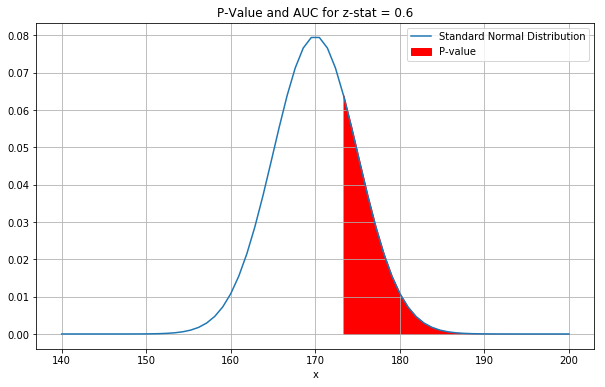

In [3]:
# let's see for the body weight problem
x = np.linspace(140, 200, 64)
mu = 170  # H_0 is true!
sigma = 5  # calcualted for 64 samples
f_x = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_normed = (x - mu) / sigma

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, f_x, label='Standard Normal Distribution')
ax.fill_between(x[np.where(x.astype(int)==173)[0][0]:], y1=f_x[np.where(x.astype(int)==173)[0][0]:],
                color='red', label="P-value")
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_title('P-Value and AUC for z-stat = 0.6')
p_val = np.sum(f_x[np.where(x.astype(int)==173)[0][0]:])
print('p-val (AUC) = {:.3f}'.format(p_val))

p-val (AUC) = 0.001


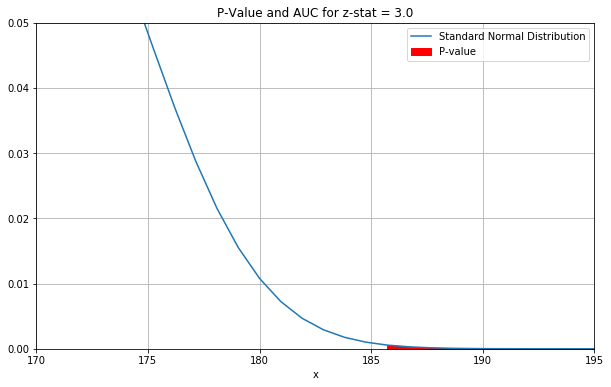

In [4]:
# let's see for the body weight problem
x = np.linspace(140, 200, 64)
mu = 170  # H_0 is true!
sigma = 5  # calcualted for 64 samples
f_x = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_normed = (x - mu) / sigma

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, f_x, label='Standard Normal Distribution')
ax.fill_between(x[np.where(x.astype(int)==185)[0][0]:], y1=f_x[np.where(x.astype(int)==185)[0][0]:],
                color='red', label="P-value")
ax.grid()
ax.legend()
ax.set_xlim([170, 195])
ax.set_ylim([0, 0.05])
ax.set_xlabel('x')
ax.set_title('P-Value and AUC for z-stat = 3.0')
p_val = np.sum(f_x[np.where(x.astype(int)==185)[0][0]:])
print('p-val (AUC) = {:.3f}'.format(p_val))

#### Interpretation
* A small p-value (typically ≤ 0.05) indicates **strong evidence against the null hypothesis $H_0$**, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

* p-values very close to the cutoff (0.05) are considered to be marginal (could go either way).

#### 4- Significance Level ($\alpha$)
* It is the degree of certainty required in order to **reject** the null hypothesis $H_0$.
* A test statistic, TS, with p-value **less** than some pre-determined false positive (or size) is said to be statistically significant at that level.
* Commonly used p-values:

|<center> P-Value &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </center> |<center> Wording </center>|
| -----------------------------------------| --------------- |
|<center> $p > 0.05$ </center>| <center> Not Significant </center>|
|<center> $0.01 \leq p \leq 0.05$ </center>|<center> Significant</center>|
|<center> $0.001 \leq p < 0.01$</center>| <center> Very Significant </center>|
|<center> $p < 0.001$</center>| <center> Extremely Significant </center>|

## <img src="https://img.icons8.com/bubbles/50/000000/close-window.png" style="height:50px;display:inline"> Error Types
<img src="./assets/tut_02_error_types.jpg" style="height:300px">

* **Type I Error (False Positive)** -  the incorrect rejection of a true null hypothesis. Usually a type I error leads one to conclude that a supposed effect or relationship exists when in fact it doesn't. 
    * For example, a test that shows a patient to have a disease when in fact the patient does not have the disease, a fire alarm going on indicating a fire when in fact there is no fire, or an experiment indicating that a medical treatment should cure a disease when in fact it does not.
    * The chance of **rejecting the null hypthesis $H_0$, when it is TRUE**, denoted by $\alpha$
    * $\rightarrow$ the chance of **accepting the null hypthesis $H_0$, when it is TRUE** is $1 - \alpha$
    
* **Type II Error (False Negative)** - the failure to reject a false null hypothesis.
    * For example, a blood test failing to detect the disease it was designed to detect, in a patient who really has the disease; a fire breaking out and the fire alarm does not ring; or a clinical trial of a medical treatment failing to show that the treatment works when really it does.
    * The chance of **not rejecting the null hypothesis $H_0$, when it is FALSE**, denoted by $\beta$
    * $\rightarrow$ the chance of **rejecting the null hypthesis $H_0$, when it is FALSE** is $1 - \beta$ (also called **power**)

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:20px;display:inline"> Example - Error Types

* Hypothesis: "A patient's symptoms improve after treatment A more rapidly than after a placebo treatment."

* Null hypothesis (H0): "A patient's symptoms after treatment A are indistinguishable from a placebo."

* A Type I error would falsely indicate that treatment A is more effective than the placebo, whereas a Type II error would be a failure to demonstrate that treatment A is more effective than placebo even though it actually is more effective.

#### Confusion Matrix
Will get another meaning later in the course
<img src="./assets/tut_02_confusion_mat.jpg" style="height:300px">

## <img src="https://img.icons8.com/bubbles/50/000000/thumb-up.png" style="height:50px;display:inline"> Useful Inequalities
* **Markov Inequality** - for a non-negative R.V (Random Variable) $X \geq 0$ and for *any*  positive number $\lambda > 0$: $$ Pr(X \geq \lambda) \leq \frac{\mathbb{E}[X]}{\lambda} $$
    * Proof: Assume $X$ can take values $x_1 < x_2 < ... <x_j = \lambda < ... <x_n$, then:
    $$ \mathbb{E}[X] = \sum_{i=1}^n x_i \cdot Pr(X=x_i) \geq \sum_{i=j}^n x_i \cdot Pr(X=x_i) \geq \sum_{i=1}^n \lambda \cdot Pr(X=x_i) = \lambda \cdot \sum_{i=j}^n Pr(X=x_i) =  \lambda \cdot Pr(X \geq \lambda)$$
    
* **Chebyshev Inequality** - for any R.V (Random Variable)  $X \geq 0$ and for *any*  positive number $\lambda > 0$: $$ Pr(|X-\mathbb{E}[X]| \geq \lambda) \leq \frac{Var(X)}{\lambda^2} $$
    * Proof using the Markov Inequality.
* **Chernoff Inequality** - Let $X_1, X_2, ..., X_m$ be a sequence of *m* i.i.d Bernoulli trials, then: $$ Pr(|\frac{1}{m} \sum_i X_i - \mathbb{E}[X]| \geq \lambda) \leq e^{-\frac{\lambda^2 m}{2}} $$

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/